In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix



In [21]:
df = pd.read_parquet('/content/target1_data.parquet')
df.head(10)

,Price,Positive,Negative,Average playtime forever,release_year,release_month,release_quarter,game_age_years,release_season,genre_Adventure,...,tag_3D,tag_Pixel_Graphics,tag_Early_Access,tag_Colorful,tag_Story_Rich,tag_Cute,tag_Arcade,tag_Exploration,tag_Other,target_new
0,19.99,1.945910,2.484907,0,2008,10,4,17,3,0,...,0,0,0,0,0,0,0,0,1,0
1,0.99,3.988984,1.791759,0,2017,10,4,8,3,0,...,0,1,0,0,0,0,1,0,0,2
2,5.99,1.386294,0.000000,0,2020,7,3,5,2,1,...,0,0,0,0,0,0,0,0,0,0
3,0.00,3.931826,2.197225,0,2020,2,1,5,0,1,...,0,0,0,0,1,0,0,0,0,2
4,0.00,4.477337,3.912023,0,2021,2,1,4,0,1,...,0,0,0,0,0,0,0,1,0,2
5,10.99,3.091042,2.079442,0,2022,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,1
6,14.99,4.343805,1.945910,0,2020,4,2,5,1,1,...,0,0,0,0,0,0,0,0,0,2
7,3.99,5.420535,3.828641,1,2014,11,4,11,3,1,...,0,0,0,0,0,0,1,0,0,2
8,23.99,6.380123,5.361292,1,2019,10,4,6,3,0,...,0,0,0,0,0,0,0,0,0,2
9,0.00,4.997212,4.077537,1,2016,7,3,9,2,0,...,0,0,0,0,0,0,0,0,0,2


In [22]:
x = df.drop(columns=['target_new'])
y = df['target_new']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state=42)

In [23]:
dt = xgb.XGBClassifier()
model = dt.fit(x_train,y_train)
model.score(x_test,y_test)

0.87109375

In [24]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

print("\nx_train head:")
display(x_train.head())

print("\nx_test head:")
display(x_test.head())

print("\ny_train head:")
display(y_train.head())

print("\ny_test head:")
display(y_test.head())

x_train shape: (55288, 40)
y_train shape: (55288,)
x_test shape: (6144, 40)
y_test shape: (6144,)

x_train head:


,Price,Positive,Negative,Average playtime forever,release_year,release_month,release_quarter,game_age_years,release_season,genre_Adventure,...,tag_Atmospheric,tag_3D,tag_Pixel_Graphics,tag_Early_Access,tag_Colorful,tag_Story_Rich,tag_Cute,tag_Arcade,tag_Exploration,tag_Other
35376,3.99,1.098612,0.000000,0,2022,5,2,3,1,1,...,0,0,0,0,0,0,1,0,0,0
35223,9.99,3.091042,0.693147,0,2019,8,3,6,2,0,...,0,0,1,0,0,1,0,0,0,0
12542,3.99,2.944439,3.367296,0,2018,7,3,7,2,0,...,0,0,0,0,0,0,0,0,0,0
11459,19.99,2.302585,1.945910,0,2022,6,2,3,2,1,...,0,1,0,1,0,0,0,0,0,0
26216,4.99,2.564949,2.079442,0,2020,10,4,5,3,0,...,0,1,0,0,0,0,0,0,0,0



x_test head:


,Price,Positive,Negative,Average playtime forever,release_year,release_month,release_quarter,game_age_years,release_season,genre_Adventure,...,tag_Atmospheric,tag_3D,tag_Pixel_Graphics,tag_Early_Access,tag_Colorful,tag_Story_Rich,tag_Cute,tag_Arcade,tag_Exploration,tag_Other
26611,14.99,4.304065,3.178054,0,2020,3,1,5,1,1,...,1,0,0,0,0,1,1,0,0,0
27806,0.99,2.397895,1.791759,0,2019,12,4,6,0,0,...,1,0,0,0,0,0,0,0,0,0
49740,14.99,6.306275,4.574711,1,2015,3,1,10,1,0,...,0,0,0,0,0,0,0,0,0,1
9069,9.99,5.241747,4.736198,0,2013,11,4,12,3,0,...,0,0,0,0,0,0,0,0,0,0
6196,29.99,3.610918,2.079442,0,2018,2,1,7,0,0,...,0,0,0,0,0,0,0,0,0,1



y_train head:


,target_new
35376,0
35223,1
12542,1
11459,0
26216,0



y_test head:


,target_new
26611,2
27806,0
49740,2
9069,2
6196,1


In [25]:

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_model = xgb.XGBClassifier(
    random_state=42,
    tree_method='hist',
    device='cuda',
    use_label_encoder=False,
    eval_metric='mlogloss'
)

print("XGBoost modeli GPU ayarlarıyla (hist/cuda) hazırlandı.")

# 3. Sınıf Ağırlıklarını Hesapla (Dengesiz veri seti için)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Her bir örnek için ağırlık ataması
sample_weights_array = y_train.map(class_weight_dict)

# 4. RandomizedSearchCV Kurulumu
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=1,
    random_state=42
)

print("RandomizedSearchCV başlıyor...")

# 5. Eğitimi Başlat
random_search.fit(x_train, y_train, sample_weight=sample_weights_array)

print("Eğitim başarıyla tamamlandı.")
print("En iyi parametreler:", random_search.best_params_)
print("En iyi skor:", random_search.best_score_)

XGBoost modeli GPU ayarlarıyla (hist/cuda) hazırlandı.
RandomizedSearchCV başlıyor...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   4.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   3.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.7; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_

En iyi model parametreleri: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.9}

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2046
           1       0.79      0.80      0.79      1986
           2       0.94      0.87      0.90      2112

    accuracy                           0.87      6144
   macro avg       0.87      0.87      0.87      6144
weighted avg       0.87      0.87      0.87      6144


Confusion Matrix:
[[1906  140    0]
 [ 293 1586  107]
 [   0  282 1830]]


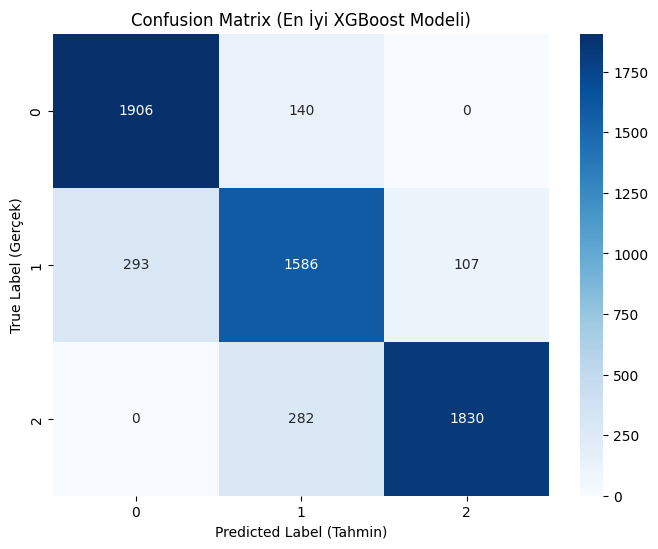

In [26]:
# 1. En iyi modeli RandomizedSearchCV içinden alıyoruz
best_model = random_search.best_estimator_

print("En iyi model parametreleri:", random_search.best_params_)

# 2. Test seti üzerinde tahmin yapıyoruz
y_pred = best_model.predict(x_test)

# 3. Classification Report oluştur ve yazdır
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix oluştur
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 5. Görselleştirme (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.xlabel('Predicted Label (Tahmin)')
plt.ylabel('True Label (Gerçek)')
plt.title('Confusion Matrix (En İyi XGBoost Modeli)')
plt.show()